## Neural Network Approach for Seasonal Items Forecasting of a Retail Store 
## Prophet method

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import seaborn as sns
from statsmodels.graphics import tsaplots
import statsmodels.api as sm
from pylab import rcParams
import itertools
import warnings
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import sys

## Load Dataset

In [2]:
data= pd.read_excel('../data/MRP_data.xls')

## Edit columns names

In [3]:
# Lower case column names
data.columns = map(str.lower, data.columns)

#Replace spaces with '_'
data.columns = data.columns.str.replace(" ", "_")
data.columns = data.columns.str.replace("-", "_")
data.columns

Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'country', 'city', 'state',
       'postal_code', 'region', 'product_id', 'category', 'sub_category',
       'product_name', 'sales', 'quantity', 'discount', 'profit'],
      dtype='object')

## Separate dataframe of each category

In [4]:
furniture=data.loc[data['category'] == 'Furniture']

technology=data.loc[data['category'] == 'Technology']
office=data.loc[data['category'] == 'Office Supplies']

## Aggregating sales data by date

In [5]:
furniture= furniture.groupby('order_date')['sales'].sum().reset_index()

technology= technology.groupby('order_date')['sales'].sum().reset_index()
office= office.groupby('order_date')['sales'].sum().reset_index()

In [6]:
#Set index 
furniture = furniture.set_index('order_date')

technology = technology.set_index('order_date')
office = office.set_index('order_date')

In [7]:
#Resampling the data on monthly frequency
# Using averages daily sales value - set start of the month as index
df = furniture['sales'].resample('MS').mean()

#avg_technology_sales = technology_sales['sales'].resample('MS').mean()
#avg_office_sales = office_sales['sales'].resample('MS').mean()

### Train and test split

In [8]:
X = df
train_size = int(len(X) * 0.75)
trainset, testset= X[0:train_size], X[train_size:]

## Prophet First model

In [9]:
#df_furniture = pd.DataFrame({'order_date':df.index, 'sales':df.values})
df_furniture_train = pd.DataFrame({'order_date':trainset.index, 'sales':trainset.values})
df_furniture_test = pd.DataFrame({'order_date':testset.index, 'sales':testset.values})

In [11]:
warnings.filterwarnings("ignore")
from fbprophet import Prophet
#df_furniture = df_furniture.rename(columns={'order_date': 'ds', 'sales': 'y'})
df_furniture_train = df_furniture_train.rename(columns={'order_date': 'ds', 'sales': 'y'})
df_furniture_test = df_furniture_test.rename(columns={'order_date': 'ds', 'sales': 'y'})

In [12]:
# set the uncertainty interval to 95% (Prophet default is 80%)
furniture_model = Prophet(interval_width=0.95)
#furniture_model.fit(df_furniture)
furniture_model.fit(df_furniture_train)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [13]:
furniture_forecast = furniture_model.make_future_dataframe(periods=12, freq='MS')
furniture_forecast = furniture_model.predict(furniture_forecast)

<Figure size 1296x432 with 0 Axes>

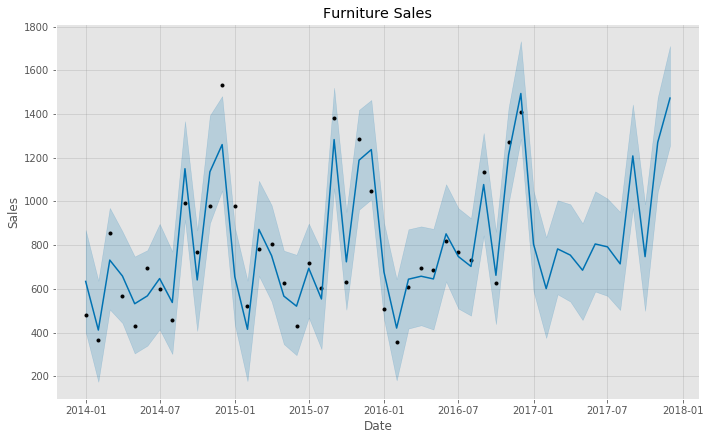

In [14]:
plt.figure(figsize=(18, 6))
furniture_model.plot(furniture_forecast, xlabel = 'Date', ylabel = 'Sales')
plt.title('Furniture Sales')
plt.show()

In [15]:
furniture_forecast.drop(columns=['multiplicative_terms', 'multiplicative_terms_lower','multiplicative_terms_upper'])

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,yhat
0,2014-01-01,681.588219,403.537342,869.071923,681.588219,681.588219,-47.448838,-47.448838,-47.448838,-47.448838,-47.448838,-47.448838,634.139381
1,2014-02-01,685.636335,174.678299,637.582649,685.636335,685.636335,-274.076247,-274.076247,-274.076247,-274.076247,-274.076247,-274.076247,411.560088
2,2014-03-01,689.292697,505.723801,970.542150,689.292697,689.292697,42.432009,42.432009,42.432009,42.432009,42.432009,42.432009,731.724706
3,2014-04-01,693.340812,443.472883,862.637276,693.340812,693.340812,-34.565068,-34.565068,-34.565068,-34.565068,-34.565068,-34.565068,658.775745
4,2014-05-01,697.258344,304.605093,748.057411,697.258344,697.258344,-165.311506,-165.311506,-165.311506,-165.311506,-165.311506,-165.311506,531.946837
5,2014-06-01,701.306459,340.079606,777.031418,701.306459,701.306459,-133.386474,-133.386474,-133.386474,-133.386474,-133.386474,-133.386474,567.919985
6,2014-07-01,705.223990,414.546773,897.395695,705.223990,705.223990,-58.042923,-58.042923,-58.042923,-58.042923,-58.042923,-58.042923,647.181067
7,2014-08-01,709.272106,301.905155,770.761547,709.272106,709.272106,-171.626465,-171.626465,-171.626465,-171.626465,-171.626465,-171.626465,537.645640
8,2014-09-01,713.320221,916.199294,1367.622410,713.320221,713.320221,436.759246,436.759246,436.759246,436.759246,436.759246,436.759246,1150.079467
9,2014-10-01,717.237752,407.715552,867.723546,717.237752,717.237752,-76.340818,-76.340818,-76.340818,-76.340818,-76.340818,-76.340818,640.896934


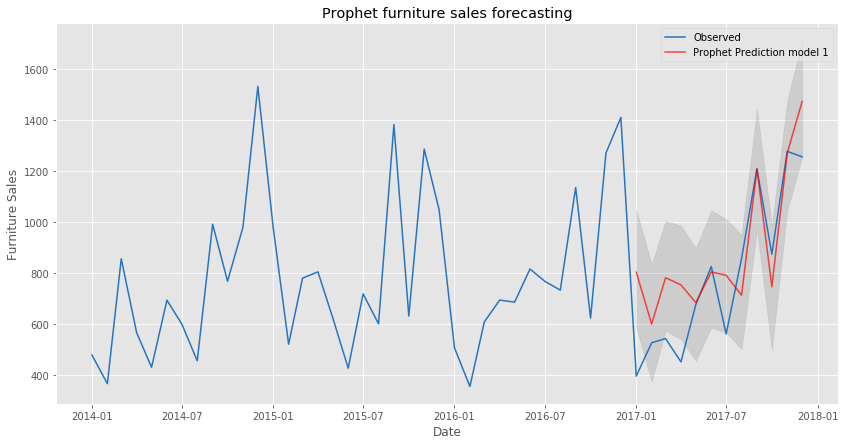

In [16]:
rcParams['figure.figsize'] = 14, 7
plt.plot(df.index, df.values,label='Observed',color='#2574BF')
plt.plot(df[36:48].index,furniture_forecast[36:48]['yhat'].values,label='Prophet Prediction model 1', alpha= 0.7, color='red')
plt.fill_between(df[36:48].index,
                #lower sales
                furniture_forecast[36:48]['yhat_lower'].values,
                #upper sales
                furniture_forecast[36:48]['yhat_upper'].values, color='k', alpha=0.1)
plt.title('Prophet furniture sales forecasting')
plt.xlabel('Date')
plt.ylabel('Furniture Sales')
plt.legend()
plt.show()

In [17]:
def performance(y_true, y_pred): 
    #y_true, y_pred = np.array(y_true), np.array(y_pred)
    mse = ((y_pred - y_true) ** 2).mean()
    mape= np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return( print(' The MSE of forecasts is {}'.format(round(mse, 2))+
                  '\n The RMSE of forecasts is {}'.format(round(np.sqrt(mse), 2))+
                  '\n The MAPE of forecasts is {}'.format(round(mape, 2))))

In [18]:
performance(df[36:48].values, furniture_forecast[36:48]['yhat'])

 The MSE of forecasts is 37992.52
 The RMSE of forecasts is 194.92
 The MAPE of forecasts is 26.67


### Prophet Second model - applying holiday

In [19]:
#add holidays
new_year_holidays = pd.DataFrame({'holiday': "New Year's Day", 'ds' : pd.to_datetime(['2014-01-01', '2015-01-01','2016-01-01'])}) 
# more accurate without holidays!
furniture_model2 = Prophet(yearly_seasonality=True, holidays=new_year_holidays)
#furniture_model2.fit(df_furniture)
furniture_model2.fit(df_furniture_train)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [20]:
furniture_forecast2 = furniture_model2.make_future_dataframe(periods=36, freq='MS')
furniture_forecast2 = furniture_model2.predict(furniture_forecast2)

<Figure size 1296x432 with 0 Axes>

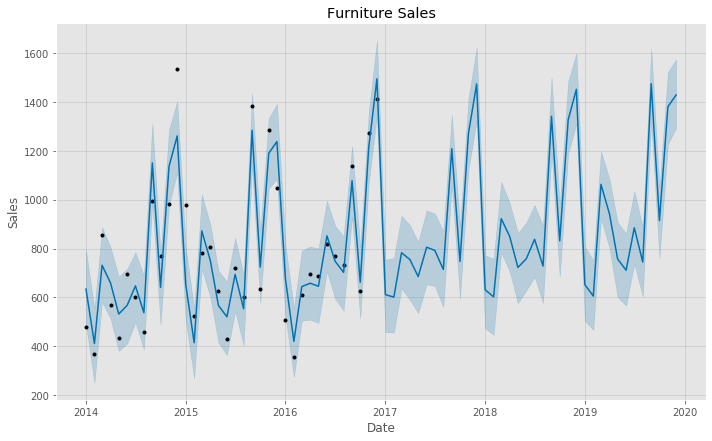

In [21]:
plt.figure(figsize=(18, 6))
furniture_model2.plot(furniture_forecast2, xlabel = 'Date', ylabel = 'Sales')
plt.title('Furniture Sales')
plt.show()

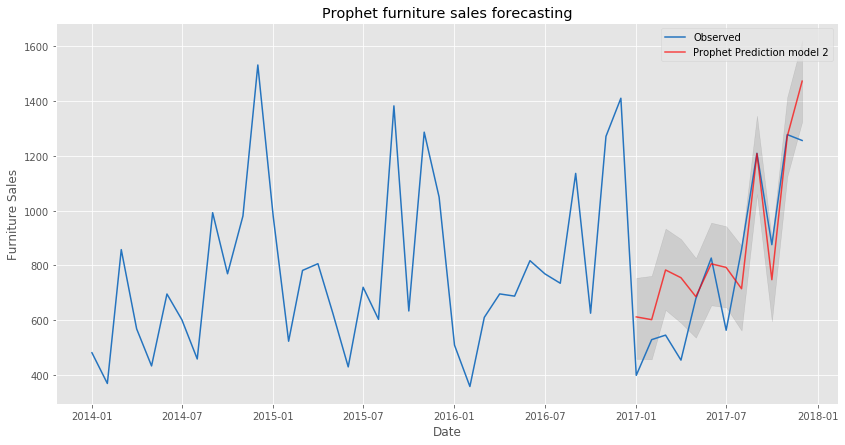

In [22]:
rcParams['figure.figsize'] = 14, 7
plt.plot(df.index, df.values,label='Observed',color='#2574BF')
plt.plot(df[36:48].index,furniture_forecast2[36:48]['yhat'].values,label='Prophet Prediction model 2', alpha= 0.7, color='red')
plt.fill_between(df[36:48].index,
                #lower sales
                furniture_forecast2[36:48]['yhat_lower'].values,
                #upper sales
                furniture_forecast2[36:48]['yhat_upper'].values, color='k', alpha=0.1)
plt.title('Prophet furniture sales forecasting')
plt.xlabel('Date')
plt.ylabel('Furniture Sales')
plt.legend()
plt.show()

In [23]:
performance(df[36:48].values, furniture_forecast2[36:48]['yhat'])

 The MSE of forecasts is 27986.56
 The RMSE of forecasts is 167.29
 The MAPE of forecasts is 22.62
